# Lista 3 - Algoritmo de Monte Carlo e Cadeia de Markov

## Vilma Bezerra Alves - 30 de Junho de 2020

In [79]:
import numpy as np
import math
import pylab

from matplotlib import pyplot as plt

### Questão 1
#### 1. 
Seja X~U(0,1). Vamos considerar a indicadora $I$ para $P[x^2 \leq 1/2]$. 

Portanto, 
$$E[I(x^2 \leq 1/2)] = 0 \cdot P[x^2 \geq 1/2] + 1 \cdot P[x^2 \leq 1/2]$$
$$E[I(x^2 \leq 1/2)] = P \bigg[x^2 \leq \frac{1}{2} \bigg]$$
$$E[I(x^2 \leq 1/2)] = P \bigg[x \leq \frac{1}{\sqrt{2}}\bigg]$$
$$E[I(x^2 \leq 1/2)] = P \bigg[x \leq \frac{\sqrt{2}}{2}\bigg]$$

Dado que $x$ é uniforme,
$$E[I(x^2 \leq 1/2)] = \frac{\sqrt{2}}{2}$$

#### 2.
Sabendo que a indicadora segue distribuição de Bernoulli, temos:
$$Var[x] = p(1 - p)$$
$$Var[x] = P[x^2 \leq 1/2](1 - P[x^2 \leq 1/2])$$
$$Var[x] = P[x^2 \leq 1/2] - (P[x^2 \leq 1/2])^2$$
$$Var[x] = \frac{\sqrt{2}}{2} - \bigg(\frac{\sqrt{2}}{2}\bigg)^2$$
$$Var[x] = \frac{\sqrt{2} - 1}{2}$$

#### 3.
Pela lei dos grandes números sabemos que a $M_n$ converge para o $E[x]$. Com isso, temos
$$M_n = \frac{\sqrt{2}}{2}$$
$$\sqrt{2} = 2M_n$$

Para isso, vamos estimar o valor de M_n usando o método de Monte Carlo, como mostrado no código abaixo

In [76]:
def generate_sample_monte_carlo(number_samples):
    indicator_function = np.random.rand(number_samples)**2 <= .5
    return indicator_function


def calculate_mn(samples, number_samples):
    x_axis = np.arange(1, number_samples+1)
    return np.cumsum(samples) / x_axis


number_samples = int(1e6)
samples = generate_sample_monte_carlo(number_samples)
m_n = calculate_mn(samples, number_samples)
m_n[-1]

0.707351

In [77]:
def calculate_sqrt2_estimative(m_n):
    return 2*m_n
sqrt_2 = calculate_sqrt2_estimative(m_n)
sqrt_2[-1]

1.414702

Com isso, temos que o valor estimado para é aproximadamente $\sqrt{2} = 2 \cdot 0.707$, o que é aproximadamente $1.415$

#### 4.
Agora sendo $ê_n$ o erro relativo para $n = 1, ..., 10^6$ levando em consideração o valor real de $\sqrt{2}$, temos o seguinte gráfico

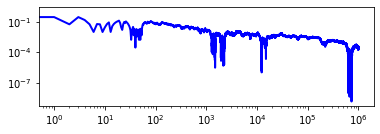

In [78]:
def calculate_error(m_n):
    return np.abs(m_n - math.sqrt(2)) / math.sqrt(2)

errors = calculate_error(calculate_sqrt2_estimative(calculate_mn(samples, number_samples)))
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(errors, color='blue', lw=2)

ax.set_yscale('log')
ax.set_xscale('log')

pylab.show()

Com isso, podemos perceber que o erro diminui a medida que aumentamos a quantidade de amostras.

## Se X é discreto:

$E[X] = \sum_{i=a}^b P(X=i)i$

## Se X é contínuo:

$E[X] = \int_a^b f(x)x dx$